In [2]:
import pandas as pd
from matplotlib import pyplot as plt

# Batch 1 Data EDA

In [3]:
batch1 = pd.read_csv('/Users/shelleygoel/Code/battery_life_model/datasets/tri/Batch_1.csv')

In [4]:
batch1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40951666 entries, 0 to 40951665
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   index       int64  
 2   I           float64
 3   Qc          float64
 4   Qd          float64
 5   T           float64
 6   V           float64
 7   t           float64
 8   cell_type   object 
dtypes: float64(6), int64(2), object(1)
memory usage: 2.7+ GB


In [5]:
batch1.describe()

,Unnamed: 0,index,I,Qc,Qd,T,V,t
count,4.095167e+07,4.095167e+07,4.095167e+07,4.095167e+07,4.095167e+07,4.095167e+07,4.095167e+07,4.095167e+07
mean,4.341474e+02,4.341474e+02,4.258591e-02,8.305295e-01,2.802235e-01,3.341632e+01,3.102080e+00,3.348331e+01
std,2.765926e+02,2.765926e+02,3.305544e+00,3.613669e-01,4.117133e-01,2.468575e+00,5.416468e-01,1.528188e+02
min,0.000000e+00,0.000000e+00,-4.708151e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.030000e+02,2.030000e+02,-3.999819e+00,7.800775e-01,6.996788e-10,3.144079e+01,2.864279e+00,9.771638e+00
50%,4.120000e+02,4.120000e+02,5.268010e-02,1.014781e+00,1.844345e-08,3.323259e+01,3.357477e+00,2.549397e+01
75%,6.300000e+02,6.300000e+02,2.400912e+00,1.065203e+00,6.286239e-01,3.513223e+01,3.518129e+00,3.900899e+01
max,1.225000e+03,1.225000e+03,8.169455e+00,2.965895e+00,2.884085e+00,4.341938e+01,6.606142e+00,4.074613e+03


In [6]:
b1c0_df = batch1[batch1.cell_type == "b1c0"]
cycle_df = b1c0_df[(b1c0_df["index"] == 1)]
discharge_df = cycle_df[cycle_df.I < 0] 
charge_df = cycle_df[(cycle_df.I >= 0) & (cycle_df.Qd == 0)]

# Charge Profile

In [7]:
charge_df

,Unnamed: 0,index,I,Qc,Qd,T,V,t,cell_type
2,1,1,0.000000,0.000000,0.0,31.632496,2.026416,0.000000,b1c0
3,1,1,0.215908,0.000001,0.0,31.632496,2.039388,0.002417,b1c0
4,1,1,0.359831,0.000001,0.0,31.632496,2.051660,0.002912,b1c0
5,1,1,0.467846,0.000001,0.0,31.632496,2.063070,0.003212,b1c0
6,1,1,0.575877,0.000001,0.0,31.632496,2.076204,0.003498,b1c0
...,...,...,...,...,...,...,...,...,...
655,1,1,0.047898,1.070823,0.0,29.628511,3.599761,34.106608,b1c0
656,1,1,0.047905,1.070896,0.0,29.609203,3.599794,34.189852,b1c0
657,1,1,0.047900,1.070969,0.0,29.604231,3.599821,34.273242,b1c0
658,1,1,0.047893,1.071042,0.0,29.585907,3.599888,34.356535,b1c0


Text(0.5, 1.0, 'charge capacity')

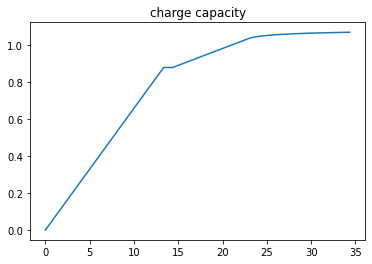

In [8]:
plt.plot(charge_df.t, charge_df.Qc)
plt.title("charge capacity")

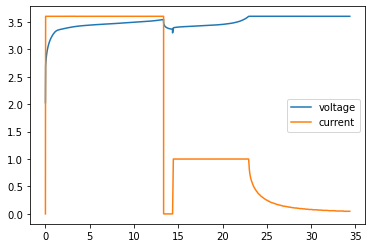

In [9]:
plt.plot(charge_df.t, charge_df.V, label="voltage")
plt.plot(charge_df.t, charge_df.I, label="current")
plt.legend()

In [10]:
charge_df.Qc.max()

1.0710422

# Discharge Profile

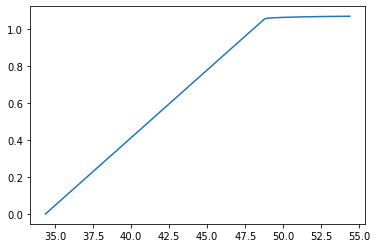

In [11]:
plt.plot(discharge_df.t, discharge_df.Qd)

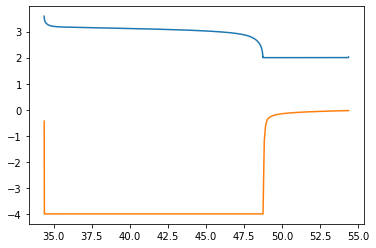

In [12]:
plt.plot(discharge_df.t, discharge_df.V)
plt.plot(discharge_df.t, discharge_df.I)

In [13]:
discharge_df

,Unnamed: 0,index,I,Qc,Qd,T,V,t,cell_type
660,1,1,-0.439630,1.071042,0.000000,29.585907,3.589563,34.358435,b1c0
661,1,1,-0.920006,1.071042,0.000000,29.585907,3.578016,34.359667,b1c0
662,1,1,-1.319441,1.071042,0.000000,29.585907,3.567860,34.360843,b1c0
663,1,1,-1.760221,1.071042,0.000000,29.585907,3.556234,34.361923,b1c0
664,1,1,-2.119897,1.071042,0.000128,29.585907,3.546163,34.362980,b1c0
...,...,...,...,...,...,...,...,...,...
1083,1,1,-0.034730,1.071042,1.070677,31.712118,2.000016,54.337468,b1c0
1084,1,1,-0.034227,1.071042,1.070688,31.712118,1.999842,54.357120,b1c0
1085,1,1,-0.034227,1.071042,1.070689,31.712118,2.002296,54.358155,b1c0
1086,1,1,-0.034227,1.071042,1.070689,31.712118,2.012406,54.365115,b1c0


# Target Variable

In [14]:
charge_all_cycles = batch1[(batch1.I >= 0) & (batch1.Qd == 0)]
discharge_all_cycles = batch1[batch1.I < 0]

In [15]:

features = charge_all_cycles.groupby(["cell_type", "index"]).agg({"I": ["mean", "std"], "V": ["mean", "std"]})
features["Id"] = discharge_all_cycles.groupby(["cell_type", "index"]).I.min()

In [16]:
features

I                   V                  Id
                     mean       std      mean       std          
cell_type index                                                  
b1c0      0      0.000000  0.000000  0.000000  0.000000       NaN
          1      1.888059  1.540649  3.371237  0.332757 -4.001016
          2      1.875325  1.555370  3.377389  0.322449 -4.001594
          3      1.888923  1.552188  3.372597  0.326271 -4.001225
          4      1.828081  1.538320  3.373100  0.328886 -4.001068
...                   ...       ...       ...       ...       ...
b1c9      1048   4.430667  1.593626  3.047727  0.489099 -4.000421
          1049   4.463918  1.577428  3.043812  0.487641 -4.000582
          1050   4.398965  1.615627  3.056788  0.483037 -4.000466
          1051   4.378029  1.607432  3.040933  0.486592 -4.000477
          1052   4.444758  1.599785  3.046391  0.492141 -4.000521

[38749 rows x 5 columns]

In [17]:
features["label"] = discharge_all_cycles.groupby(["cell_type", "index"]).Qd.max()

In [19]:
features

I                   V                  Id     label
                     mean       std      mean       std                    
cell_type index                                                            
b1c0      0      0.000000  0.000000  0.000000  0.000000       NaN       NaN
          1      1.888059  1.540649  3.371237  0.332757 -4.001016  1.070689
          2      1.875325  1.555370  3.377389  0.322449 -4.001594  1.071900
          3      1.888923  1.552188  3.372597  0.326271 -4.001225  1.072510
          4      1.828081  1.538320  3.373100  0.328886 -4.001068  1.073174
...                   ...       ...       ...       ...       ...       ...
b1c9      1048   4.430667  1.593626  3.047727  0.489099 -4.000421  0.884375
          1049   4.463918  1.577428  3.043812  0.487641 -4.000582  0.885041
          1050   4.398965  1.615627  3.056788  0.483037 -4.000466  0.883019
          1051   4.378029  1.607432  3.040933  0.486592 -4.000477  0.882054
          1052   4.444758  1.599785  3.046391  0.492141 -4.000521  0.880928

[38749 rows x 6 columns]

<AxesSubplot:xlabel='cell_type,index'>

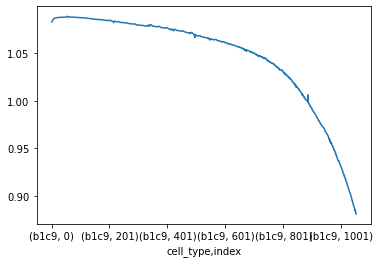

In [20]:
idx = pd.IndexSlice
features.loc[idx['b1c9', :], "label"].plot()

In [23]:
features = features.dropna()

In [77]:
features = features[features.label < 1.1]

In [80]:
X = features[["I", "V", "Id"]].reset_index(drop=True)
X

I                   V                  Id
           mean       std      mean       std          
0      1.888059  1.540649  3.371237  0.332757 -4.001016
1      1.875325  1.555370  3.377389  0.322449 -4.001594
2      1.888923  1.552188  3.372597  0.326271 -4.001225
3      1.828081  1.538320  3.373100  0.328886 -4.001068
4      1.870990  1.554969  3.376715  0.323520 -4.001379
...         ...       ...       ...       ...       ...
18097  4.430667  1.593626  3.047727  0.489099 -4.000421
18098  4.463918  1.577428  3.043812  0.487641 -4.000582
18099  4.398965  1.615627  3.056788  0.483037 -4.000466
18100  4.378029  1.607432  3.040933  0.486592 -4.000477
18101  4.444758  1.599785  3.046391  0.492141 -4.000521

[18102 rows x 5 columns]

In [81]:
Y = features["label"].reset_index(drop=True)
Y

0        1.070689
1        1.071900
2        1.072510
3        1.073174
4        1.073576
           ...   
18097    0.884375
18098    0.885041
18099    0.883019
18100    0.882054
18101    0.880928
Name: label, Length: 18102, dtype: float64

In [82]:
np.max(Y)

1.0982422

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, train_size=0.8)

In [85]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(14481, 5) (14481,) (3621, 5) (3621,)


In [86]:
lr = LinearRegression()

In [87]:
lr.fit(X_train, Y_train)

LinearRegression()

In [88]:
Y_pred = lr.predict(X_test)

In [89]:
score = lr.score(X_test, Y_test)
score

0.2658814745220043

In [90]:
lr.score(X_train, Y_train)

0.2028485788136265

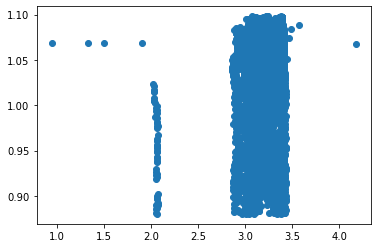

In [91]:
plt.scatter(X_train[:, 2], Y_train)

In [66]:
import numpy as np
np.max(Y_train)

2.884083

In [67]:
features['label'].max()

2.884083

In [69]:
charge_df[["Qc", "Qd"]].max()

Qc    1.071042
Qd    0.000000
dtype: float64

In [72]:
discharge_df["Qc"].max()

1.0710422

In [74]:
discharge_all_cycles.Qd.argmax()

7570677

In [76]:
discharge_all_cycles.iloc[discharge_all_cycles.Qd.argmax()]

Unnamed: 0             39
index                  39
I               -0.099939
Qc               2.938399
Qd               2.884083
T               31.207449
V                2.000312
t             2721.108057
cell_type           b1c18
Name: 18459246, dtype: object